In [ ]:
pip install twython

In [ ]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, f1_score
import random
from wordcloud import WordCloud
#hs
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer as VS
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/PROJECT/Reviews.csv')
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [ ]:
print(len(df))

#Removing duplicate entries based on past knowledge.
df = df.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
print(len(df))

568454
393933


In [ ]:
print(len(df))

#Removing the entries where HelpfulnessNumerator > HelpfulnessDenominator.
df = df[df.HelpfulnessNumerator <= df.HelpfulnessDenominator]

print(len(df))

393933
393931


In [ ]:
df['Score'].value_counts()

5    250961
4     56093
1     36306
3     29769
2     20802
Name: Score, dtype: int64

In [ ]:
df = df[['Time', 'Text', 'Score']]

In [ ]:
print(df)

              Time                                               Text  Score
0       1303862400  I have bought several of the Vitality canned d...      5
1       1346976000  Product arrived labeled as Jumbo Salted Peanut...      1
2       1219017600  This is a confection that has been around a fe...      4
3       1307923200  If you are looking for the secret ingredient i...      2
4       1350777600  Great taffy at a great price.  There was a wid...      5
...            ...                                                ...    ...
568449  1299628800  Great for sesame chicken..this is a good if no...      5
568450  1331251200  I'm disappointed with the flavor. The chocolat...      2
568451  1329782400  These stars are small, so you can give 10-15 o...      5
568452  1331596800  These are the BEST treats for training and rew...      5
568453  1338422400  I am very satisfied ,product is as advertised,...      5

[393931 rows x 3 columns]


In [ ]:
def fuc(x):
    if x>3:
        return 1
    elif x<3:
        return -1
    else:
        return 0

# Labels as 1 - positive (score > 3) or 0 - negative (score < 3)
df['Score2'] = df['Score'].apply(fuc)

df

,Time,Text,Score,Score2
0,1303862400,I have bought several of the Vitality canned d...,5,1
1,1346976000,Product arrived labeled as Jumbo Salted Peanut...,1,-1
2,1219017600,This is a confection that has been around a fe...,4,1
3,1307923200,If you are looking for the secret ingredient i...,2,-1
4,1350777600,Great taffy at a great price. There was a wid...,5,1
...,...,...,...,...
568449,1299628800,Great for sesame chicken..this is a good if no...,5,1
568450,1331251200,I'm disappointed with the flavor. The chocolat...,2,-1
568451,1329782400,"These stars are small, so you can give 10-15 o...",5,1
568452,1331596800,These are the BEST treats for training and rew...,5,1


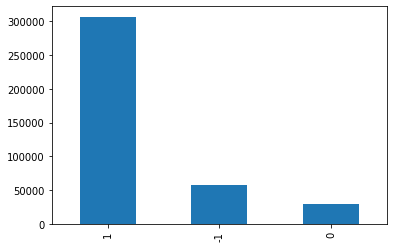

In [ ]:
df['Score2'].value_counts().plot(kind='bar')


In [ ]:
def removeHTML(sentence):
    regex = re.compile('<.*?>')
    return re.sub(regex, ' ', sentence)

In [ ]:
def removeURL(sentence):
    regex = re.compile('http[s]?://\S+')
    return re.sub(regex, ' ', sentence)

In [ ]:
def onlyAlphabets(sentence):
    regex = re.compile('[^a-zA-Z]')
    return re.sub(regex, ' ', sentence)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop = nltk.corpus.stopwords.words('english')
stop.remove('not')
print(len(stop))

178


In [ ]:

sno = nltk.stem.SnowballStemmer('english')    # Initializing stemmer


In [ ]:
positive = []    # All words in positive reviews
negative = [] # All words in negative reviews
average=[]
all_sentences = []    # All cleaned sentences


for x in range(len(df['Text'].values)):
    review = df['Text'].values[x]
    rating = df['Score2'].values[x]

    cleaned_sentence = []
    sentence = removeURL(review) 
    sentence = removeHTML(sentence)
    sentence = onlyAlphabets(sentence) 
    sentence = sentence.lower()    

    for word in sentence.split():
        if word not in stop:
            stemmed = sno.stem(word)
            cleaned_sentence.append(stemmed)
            
            if rating == 1 :
                positive.append(stemmed)
            elif rating==-1:
                negative.append(stemmed)
            else:
                average.append(stemmed)

    all_sentences.append(' '.join(cleaned_sentence))

# add as column in dataframe
df['Cleaned'] = all_sentences

In [ ]:
print(df)

              Time  ...                                            Cleaned
0       1303862400  ...  bought sever vital can dog food product found ...
1       1346976000  ...  product arriv label jumbo salt peanut peanut a...
2       1219017600  ...  confect around centuri light pillowi citrus ge...
3       1307923200  ...  look secret ingredi robitussin believ found go...
4       1350777600  ...  great taffi great price wide assort yummi taff...
...            ...  ...                                                ...
568449  1299628800  ...  great sesam chicken good not better restur eat...
568450  1331251200  ...  disappoint flavor chocol note especi weak milk...
568451  1329782400  ...  star small give one train session tri train do...
568452  1331596800  ...  best treat train reward dog good groom lower c...
568453  1338422400  ...  satisfi product advertis use cereal raw vinega...

[393931 rows x 5 columns]


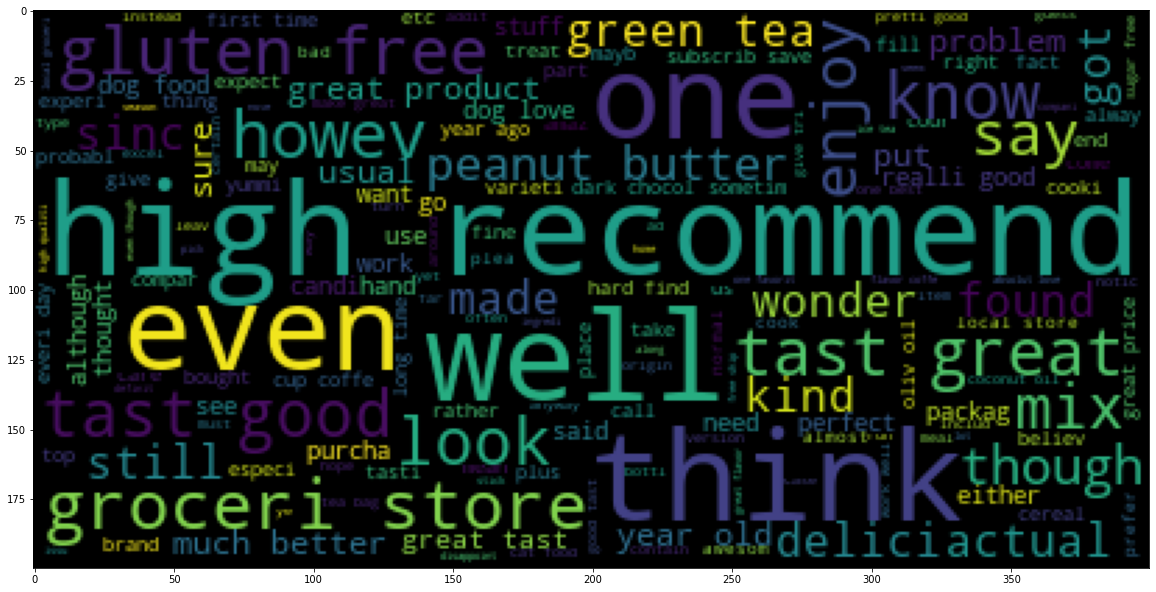

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(' '.join(positive)))

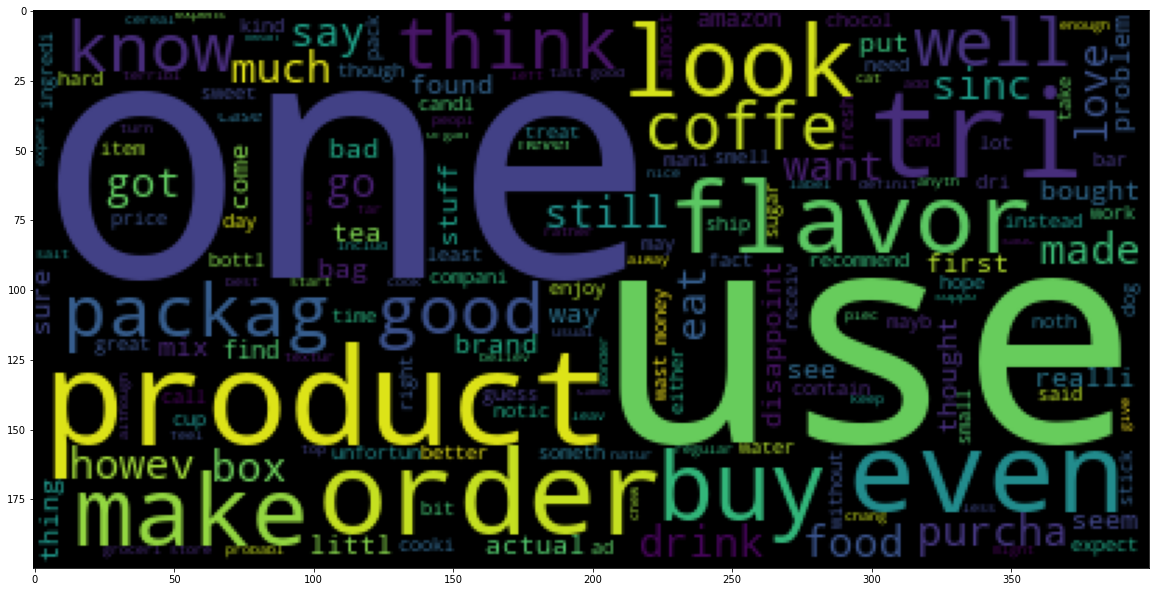

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(' '.join(negative)))


In [ ]:
df[df['Cleaned'].isna()]

,Time,Text,Score,Score2,Cleaned


In [ ]:
df = df.dropna()

df

,Time,Text,Score,Score2,Cleaned
0,1303862400,I have bought several of the Vitality canned d...,5,1,bought sever vital can dog food product found ...
1,1346976000,Product arrived labeled as Jumbo Salted Peanut...,1,-1,product arriv label jumbo salt peanut peanut a...
2,1219017600,This is a confection that has been around a fe...,4,1,confect around centuri light pillowi citrus ge...
3,1307923200,If you are looking for the secret ingredient i...,2,-1,look secret ingredi robitussin believ found go...
4,1350777600,Great taffy at a great price. There was a wid...,5,1,great taffi great price wide assort yummi taff...
...,...,...,...,...,...
568449,1299628800,Great for sesame chicken..this is a good if no...,5,1,great sesam chicken good not better restur eat...
568450,1331251200,I'm disappointed with the flavor. The chocolat...,2,-1,disappoint flavor chocol note especi weak milk...
568451,1329782400,"These stars are small, so you can give 10-15 o...",5,1,star small give one train session tri train do...
568452,1331596800,These are the BEST treats for training and rew...,5,1,best treat train reward dog good groom lower c...


In [ ]:
df = df.sort_values('Time')

split = int(0.8*len(df))

# The latest reviews are used in the test set.
Xtrain, Xtest = df['Cleaned'][:split], df['Cleaned'][split:]
ytrain, ytest = df['Score2'][:split], df['Score2'][split:]

print("Train set - ", Xtrain.shape[0])
print("Test set - ", Xtest.shape[0])


Train set -  315144
Test set -  78787


In [ ]:
bow = CountVectorizer()
Xtrain = bow.fit_transform(Xtrain)
Xtest = bow.transform(Xtest)

Xtrain.shape, Xtest.shape

((315144, 66590), (78787, 66590))

In [ ]:
scalar = StandardScaler(with_mean=False)

scalar.fit(Xtrain)
Xtrain = scalar.transform(Xtrain)
Xtest = scalar.transform(Xtest)

In [ ]:
ytest = np.array(list(ytest))

In [ ]:
ytrain=np.array(list(ytrain))

In [ ]:
X = []
sentences = list(df['Cleaned'])
for sen in sentences:
    X.append(sen)

In [ ]:
print(df['Score2'].unique())

[ 1 -1  0]


In [ ]:
y = df['Score2']
y = np.array(list(map(lambda x: 1 if x==1 else 0,y)))


In [ ]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
#by using NN

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('/content/drive/My Drive/PROJECT/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
from keras.layers.recurrent import LSTM

In [ ]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(LSTM(128))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          6705700   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 6,823,077
Trainable params: 117,377
Non-trainable params: 6,705,700
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=3, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/3
1970/1970 [==============================] - 706s 357ms/step - loss: 0.5253 - acc: 0.7804 - val_loss: 0.3703 - val_acc: 0.8421
Epoch 2/3
1970/1970 [==============================] - 690s 350ms/step - loss: 0.3454 - acc: 0.8502 - val_loss: 0.3037 - val_acc: 0.8721
Epoch 3/3
2463/2463 [==============================] - 85s 34ms/step - loss: 0.2921 - acc: 0.8757


In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.2921340763568878
Test Accuracy: 0.8757028579711914


In [ ]:
import matplotlib.pyplot as plt 

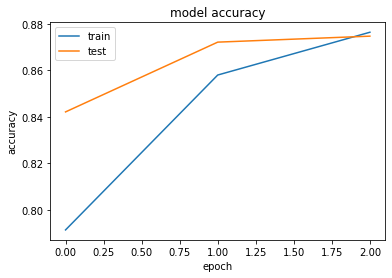

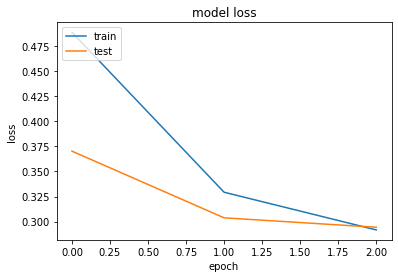

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
pip install SpeechRecognition

     |████████████████████████████████| 32.8MB 109kB/s 


In [ ]:
import speech_recognition as sr
r = sr.Recognizer()

In [ ]:
#HATESPEECH

In [ ]:
f2=pd.read_csv('/content/drive/My Drive/PROJECT/mm_hs.csv')

In [ ]:
nr,nc=f2.shape
print(f'{nr} rows and {nc} columns')

24783 rows and 7 columns


In [ ]:
f2

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [ ]:
c1=f2['class']
f2.rename(columns={'tweet' : 'text','class' : 'category'},inplace=True)
a1=f2['text']
b1=f2['category'].map({0: 'hatespeech', 1: 'offensivelanguage',2: 'none of these'})
f2= pd.concat([a1,b1,c1], axis=1)
f2.rename(columns={'category' : 'label'},inplace=True)
f2

,text,label,class
0,!!! RT @mayasolovely: As a woman you shouldn't...,none of these,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensivelanguage,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensivelanguage,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensivelanguage,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensivelanguage,1
...,...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offensivelanguage,1
24779,"you've gone and broke the wrong heart baby, an...",none of these,2
24780,young buck wanna eat!!.. dat nigguh like I ain...,offensivelanguage,1
24781,youu got wild bitches tellin you lies,offensivelanguage,1


In [ ]:
f2['text_length'] = f2['text'].apply(len)
f2


,text,label,class,text_length
0,!!! RT @mayasolovely: As a woman you shouldn't...,none of these,2,140
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensivelanguage,1,85
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensivelanguage,1,120
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensivelanguage,1,62
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensivelanguage,1,137
...,...,...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offensivelanguage,1,146
24779,"you've gone and broke the wrong heart baby, an...",none of these,2,70
24780,young buck wanna eat!!.. dat nigguh like I ain...,offensivelanguage,1,67
24781,youu got wild bitches tellin you lies,offensivelanguage,1,37


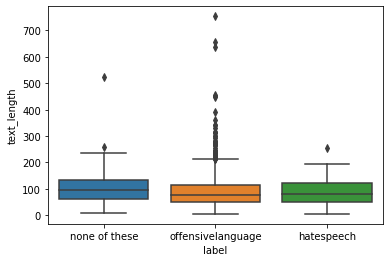

In [ ]:
sns.boxplot(x='label', y='text_length', data=f2)

In [ ]:
f21=f2.text

In [ ]:
stopwords = nltk.corpus.stopwords.words("english")
#extending the stopwords to include other words used in twitter such as retweet(rt) etc.
other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)
stemmer = PorterStemmer()
def preprocess(text):

 # removal of extra spaces
 regex_pat = re.compile(r'\s+')
 text_space = text.str.replace(regex_pat, ' ')
 # removal of @name[mention]
 regex_pat = re.compile(r'@[\w\-]+')
 text_name = text_space.str.replace(regex_pat, '')
 # removal of links[https://abc.com]
 giant_url_regex = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
 '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
 texts = text_name.str.replace(giant_url_regex, '')

 # removal of punctuations and numbers
 punc_remove = texts.str.replace("[^a-zA-Z]", " ")
 # remove whitespace with a single space
 newtext=punc_remove.str.replace(r'\s+', ' ')
 # remove leading and trailing whitespace
 newtext=newtext.str.replace(r'^\s+|\s+?$','')
 # replace normal numbers with numbr
 newtext=newtext.str.replace(r'\d+(\.\d+)?','numbr')
 # removal of capitalization
 text_lower = newtext.str.lower()

 # tokenizing
 tokenized_text = text_lower.apply(lambda x: x.split())

 # removal of stopwords
 tokenized_text= tokenized_text.apply(lambda x: [item for item in x if item not in stopwords])
 tokenized_text = tokenized_text.apply(lambda x: [stemmer.stem(i) for i in x])

 for i in range(len(tokenized_text)):
   tokenized_text[i] = ' '.join(tokenized_text[i])
   text_p= tokenized_text

 return text_p
processed_texts = preprocess(f21)
f2['processed_texts'] = processed_texts
print(f2[["text","processed_texts"]].head(10))

                                                text                                    processed_texts
0  !!! RT @mayasolovely: As a woman you shouldn't...  woman complain clean hous amp man alway take t...
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  boy dat cold tyga dwn bad cuffin dat hoe st place
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...         dawg ever fuck bitch start cri confus shit
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...                                   look like tranni
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...     shit hear might true might faker bitch told ya
5  !!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just...      shit blow claim faith somebodi still fuck hoe
6  !!!!!!"@__BrighterDays: I can not just sit up ...              sit hate anoth bitch got much shit go
7  !!!!&#8220;@selfiequeenbri: cause I'm tired of...            caus tire big bitch come us skinni girl
8  " &amp; you might not get ya bitch back &amp; ...            

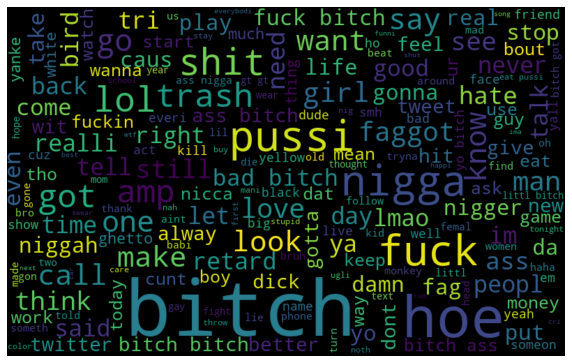

In [ ]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in f2['processed_texts'] ])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
#random=0.30
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

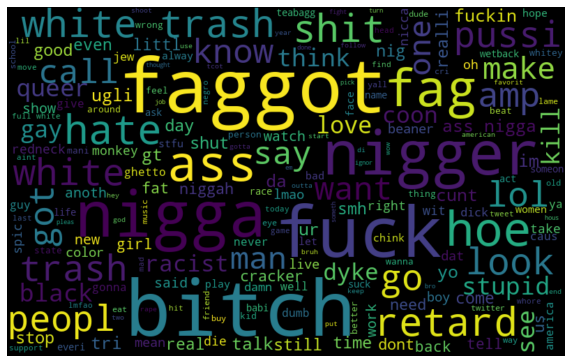

In [ ]:
hatred_words = ' '.join([text for text in f2['processed_texts'][f2['class'] == 0]])
wordcloud = WordCloud(width=800, height=500,random_state=21, max_font_size=110).generate(hatred_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

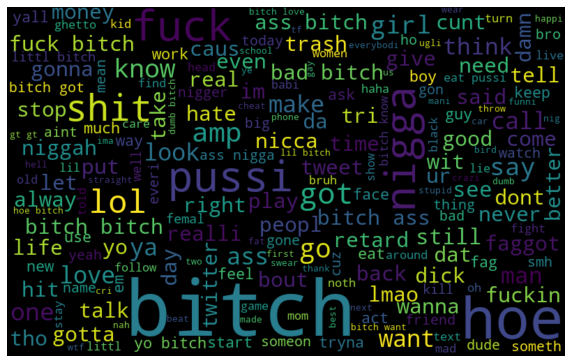

In [ ]:
offensive_words = ' '.join([text for text in f2['processed_texts'][f2['class'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(offensive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
sentiment_analyzer = VS()
def count_tags(text_c):
  space_pattern = '\s+'
  giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
 '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
  mention_regex = '@[\w\-]+'
  hashtag_regex = '#[\w\-]+'
  parsed_text = re.sub(space_pattern, ' ', text_c)
  parsed_text = re.sub(giant_url_regex, 'URLHERE', parsed_text)
  parsed_text = re.sub(mention_regex, 'MENTIONHERE', parsed_text)
  parsed_text = re.sub(hashtag_regex, 'HASHTAGHERE', parsed_text)
  return (parsed_text.count('URLHERE'),parsed_text.count('MENTIONHERE'),parsed_text.count('HASHTAGHERE'))

def sentiment_analysis(text):
  sentiment = sentiment_analyzer.polarity_scores(text)
  twitter_objs = count_tags(text)
  features = [sentiment['neg'], sentiment['pos'], sentiment['neu'], sentiment['compound'],twitter_objs[0], twitter_objs[1],twitter_objs[2]]
  return features

def sentiment_analysis_array(texts):
  features=[]
  for t in texts:
    features.append(sentiment_analysis(t))
  return np.array(features)
final_features = sentiment_analysis_array(f21)
#final_features

new_features = pd.DataFrame({'Neg':final_features[:,0],'Pos':final_features[:,1],'Neu':final_features[:,2],'Compound':final_features[:,3],
                            'url_tag':final_features[:,4],'mention_tag':final_features[:,5],'hash_tag':final_features[:,6]})
new_features

,Neg,Pos,Neu,Compound,url_tag,mention_tag,hash_tag
0,0.000,0.120,0.880,0.4563,0.0,1.0,0.0
1,0.237,0.000,0.763,-0.6876,0.0,1.0,0.0
2,0.538,0.000,0.462,-0.9550,0.0,2.0,0.0
3,0.000,0.344,0.656,0.5673,0.0,2.0,0.0
4,0.249,0.081,0.669,-0.7762,0.0,1.0,1.0
...,...,...,...,...,...,...,...
24778,0.000,0.000,1.000,0.0000,0.0,3.0,3.0
24779,0.454,0.000,0.546,-0.8074,0.0,0.0,0.0
24780,0.000,0.219,0.781,0.4738,0.0,0.0,0.0
24781,0.573,0.000,0.427,-0.7717,0.0,0.0,0.0


In [ ]:
#TF-IDF Features-F1
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVe
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(f2['processed_texts'] )
tfidf


<24783x6441 sparse matrix of type '<class 'numpy.float64'>'
	with 189618 stored elements in Compressed Sparse Row format>

In [ ]:
tfidf_a = tfidf.toarray()
modelling_features = np.concatenate([tfidf_a,final_features],axis=1)
modelling_features.shape

(24783, 6448)

In [ ]:
X1 = tfidf
y1 = f2['class'].astype(int)
X_train_tfidf1, X_test_tfidf1, y_train1, y_test1 = train_test_split(X1, y1, random_state=42, test_size=0.2)
model1 = LogisticRegression().fit(X_train_tfidf1,y_train1)
y_preds1 = model1.predict(X_test_tfidf1)
report1 = classification_report( y_test1, y_preds1 )
print(report1)
acc1=accuracy_score(y_test1,y_preds1)
print("Logistic Regression, Accuracy Score:" , acc1)


              precision    recall  f1-score   support

           0       0.56      0.18      0.27       290
           1       0.92      0.96      0.94      3832
           2       0.85      0.84      0.85       835

    accuracy                           0.90      4957
   macro avg       0.77      0.66      0.68      4957
weighted avg       0.88      0.90      0.88      4957

Logistic Regression, Accuracy Score: 0.8975186604801291


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
X1 = pd.DataFrame(modelling_features)
y1 = f2['class'].astype(int)
X_train_tfidf1, X_test_tfidf1, y_train1, y_test1 = train_test_split(X1, y1, random_state=42, test_size=0.2)
model1 = LogisticRegression().fit(X_train_tfidf1,y_train1)
y_preds1 = model1.predict(X_test_tfidf1)
report1 = classification_report( y_test1, y_preds1 )
print(report1)
acc1=accuracy_score(y_test1,y_preds1)
print("Logistic Regression, Accuracy Score:" , acc1)


              precision    recall  f1-score   support

           0       0.59      0.19      0.28       290
           1       0.92      0.96      0.94      3832
           2       0.85      0.86      0.85       835

    accuracy                           0.90      4957
   macro avg       0.78      0.67      0.69      4957
weighted avg       0.89      0.90      0.89      4957

Logistic Regression, Accuracy Score: 0.900342949364535


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
X = pd.DataFrame(modelling_features)
y = f2['class'].astype(int)
X_train_bow12, X_test_bow12, y_train12, y_test12 = train_test_split(X, y, random_state=42, test_size=0.2)
rf=RandomForestClassifier()
rf.fit(X_train_bow12,y_train12)
y_preds12 = rf.predict(X_test_bow12)
acc12=accuracy_score(y_test12,y_preds12)
report2 = classification_report( y_test12, y_preds12 )
print(report2)
print("Random Forest, Accuracy Score:",acc12)

              precision    recall  f1-score   support

           0       0.50      0.13      0.21       290
           1       0.91      0.97      0.94      3832
           2       0.85      0.85      0.85       835

    accuracy                           0.90      4957
   macro avg       0.76      0.65      0.67      4957
weighted avg       0.88      0.90      0.88      4957

Random Forest, Accuracy Score: 0.8967117207988703


In [ ]:
X = pd.DataFrame(modelling_features)
y = f2['class'].astype(int)
X_train_bow13, X_test_bow13, y_train13, y_test13 = train_test_split(X, y, random_state=42, test_size=0.2)
nb=GaussianNB()
nb.fit(X_train_bow13,y_train13)
y_preds13 = nb.predict(X_test_bow13)
acc23=accuracy_score(y_test13,y_preds13)
report13 = classification_report( y_test13, y_preds13 )
print(report13)
print("Naive Bayes, Accuracy Score:",acc23)

              precision    recall  f1-score   support

           0       0.10      0.39      0.16       290
           1       0.89      0.68      0.77      3832
           2       0.54      0.59      0.56       835

    accuracy                           0.65      4957
   macro avg       0.51      0.55      0.50      4957
weighted avg       0.79      0.65      0.70      4957

Naive Bayes, Accuracy Score: 0.650191648174299


In [ ]:
X = pd.DataFrame(modelling_features)
y = f2['class'].astype(int)
X_train_bow14, X_test_bow14, y_train14, y_test14 = train_test_split(X, y, random_state=42, test_size=0.2)
support =LinearSVC(random_state=20)
support.fit(X_train_bow14,y_train14)
y_preds14 = support.predict(X_test_bow14)
acc34=accuracy_score(y_test14,y_preds14)
report14 = classification_report( y_test14, y_preds14 )
print(report14)
print("SVM, Accuracy Score:" , acc34)

              precision    recall  f1-score   support

           0       0.46      0.26      0.33       290
           1       0.92      0.95      0.94      3832
           2       0.83      0.85      0.84       835

    accuracy                           0.89      4957
   macro avg       0.74      0.69      0.70      4957
weighted avg       0.88      0.89      0.88      4957

SVM, Accuracy Score: 0.891466612870688


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


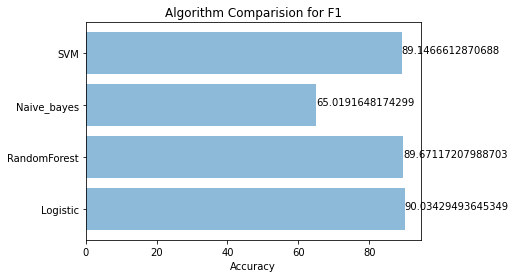

In [ ]:
objects = ('Logistic', 'RandomForest', 'Naive_bayes', 'SVM')
y_pos = np.arange(len(objects))
acc1=acc1*100
acc12=acc12*100
acc23=acc23*100
acc34=acc34*100
performance = [acc1,acc12,acc23,acc34]
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Accuracy')
plt.title('Algorithm Comparision for F1')
for index, value in enumerate(performance):
 plt. text(value, index, str(value))
plt.show()

In [ ]:
with open('/content/drive/My Drive/PROJECT/bw.txt') as f:
 list1=[word for line in f for word in line.split()]

In [ ]:
X = tfidf
y = f2['class'].astype(int)

In [ ]:
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
rf=RandomForestClassifier()
rf.fit(X_train_tfidf,y_train)
y_preds = rf.predict(X_test_tfidf)
acc1=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Random Forest, Accuracy Score:",acc1)

              precision    recall  f1-score   support

           0       0.48      0.16      0.24       290
           1       0.93      0.96      0.94      3832
           2       0.83      0.91      0.87       835

    accuracy                           0.90      4957
   macro avg       0.75      0.67      0.68      4957
weighted avg       0.89      0.90      0.89      4957

Random Forest, Accuracy Score: 0.9021585636473674


In [ ]:
def func_mm(text):
  hh=text
  cleaned_sentence = []
  sentence = removeURL(text)
  sentence = removeHTML(sentence)
  sentence = onlyAlphabets(sentence)
  sentence = sentence.lower()
  for word in sentence.split():
    if word not in stop:
      stemmed = sno.stem(word)
      cleaned_sentence.append(stemmed)
  #print(cleaned_sentence)
  ff2 = sentiment_analysis_array(cleaned_sentence)
  nf2 = pd.DataFrame({'Neg':ff2[:,0],'Pos':ff2[:,1],'Neu':ff2[:,2],'Compound':ff2[:,3],'url_tag':ff2[:,4],'mention_tag':ff2[:,5],'hash_tag':ff2[:,6]})
  nf2
  yt=pd.DataFrame(nf2)
  tt2 = tfidf_vectorizer.transform(cleaned_sentence)
  tt2a = tt2.toarray()
  op = rf.predict(tt2)
  """
  b=0
  print("Hate content:")
  for i in op:
    if (i==0) or (i==1):
      print("Yes")
      b=1
  if(b==0):
    print("No")
  """
  txt=text.split()
  res=hh
  for w in txt:
    if w in list1:
      l=len(w)
      r2='*'*l
      res=text.replace(w,r2)
      text=res
  print("After cleaning:")
  print(res)
  mm="Yes"
  ip=input("Do you want to print in Twitter application? Enter Yes if u want to. else it will be taken as No.")
  if ip.lower() == mm.lower():
    twitter.update_status(status=res)
  print("Work Done!!")

In [ ]:
pip install twython

In [ ]:
from twython import Twython
consumer_key        = 'Dcg3USX0cvXEgsrzhsu8QAjeG'
consumer_secret     = 'HutJoyFrVhhrwyYPeLSn1BMgJeM4bjL7iTKSU4AuwiF3y70LpP'
access_token        = '1381947521660899338-PZP8mFSqFS8an8YdJFgIfoncx6xLYR'
access_token_secret = 'WjNP6Qpte2cHtTwuQZgQGTqmoGX7KYuqpuTC3YcgR4iUM'

twitter = Twython(
    consumer_key,
    consumer_secret,
    access_token,
    access_token_secret
)


In [ ]:
def sa_mm_nn(a):
  audio=a
  with sr.AudioFile(audio) as source:
    audio = r.record(source)
  try:
    text = r.recognize_google(audio)
  except Exception as e:
    print (e)
  print(text)
  ht=text
  #text=a #forwithout conversion
  cleaned_sentence = []
  sentence = removeURL(text) 
  sentence = removeHTML(sentence)
  sentence = onlyAlphabets(sentence) 
  sentence = sentence.lower()    
  for word in sentence.split():
    if word not in stop:
      stemmed = sno.stem(word)
      cleaned_sentence.append(stemmed)
  instance = tokenizer.texts_to_sequences(cleaned_sentence)
  flat_list = []
  for sublist in instance:
    for item in sublist:
      flat_list.append(item)
  flat_list = [flat_list]
  instance = pad_sequences(flat_list, padding='post', maxlen=maxlen)
  x=model.predict(instance)
  print(x)
  if x<0.4:
    print("Negative")
  elif x>0.65:
    print("Positive")
  else:
    print("Neutral")
  func_mm(ht)

In [ ]:
sa_mm_nn('/content/drive/My Drive/PROJECT/audio_1.wav')


hello I saw a movie recently and it was a good one and it was a thriller movie that's why I like it very much
[[0.90489614]]
Positive
After cleaning:
hello I saw a movie recently and it was a good one and it was a thriller movie that's why I like it very much
Do you want to print in Twitter application? Enter Yes if u want to. else it will be taken as No.no
Work Done!!


In [ ]:
sa_mm_nn('/content/drive/My Drive/PROJECT/audio_2.wav')


no tea flavor at all just whole branch of artificial flavors it is not rat unable I wasted twenty bucks
[[0.13253683]]
Negative
After cleaning:
no tea flavor at all just whole branch of artificial flavors it is not rat unable I wasted twenty bucks
Do you want to print in Twitter application? Enter Yes if u want to. else it will be taken as No.no
Work Done!!


In [ ]:
sa_mm_nn('/content/drive/My Drive/PROJECT/audio_3.wav')


classmate movie is not good as their religion is ABC
[[0.16910097]]
Negative
After cleaning:
classmate movie is not good as their ******** is ABC
Do you want to print in Twitter application? Enter Yes if u want to. else it will be taken as No.no
Work Done!!


In [ ]:
sa_mm_nn('/content/drive/My Drive/PROJECT/audio_4.wav')


arrived in 6 days and was so stale I could not eat any of the six bags
[[0.23674789]]
Negative
After cleaning:
arrived in 6 days and was so stale I could not eat any of the six bags
Do you want to print in Twitter application? Enter Yes if u want to. else it will be taken as No.no
Work Done!!


In [ ]:
sa_mm_nn('/content/drive/My Drive/PROJECT/audio_5.wav')



the munchkin fresh food feeder is an okay product it's kind of like sucking on food while my daughter was interested in it for a little while I lost interest
[[0.50330573]]
Neutral
After cleaning:
the munchkin fresh food feeder is an okay product it's kind of like ******* on food while my daughter was interested in it for a little while I lost interest
Do you want to print in Twitter application? Enter Yes if u want to. else it will be taken as No.no
Work Done!!


In [ ]:
sa_mm_nn('/content/drive/My Drive/PROJECT/audio_6.wav')


I love this movie
[[0.97865415]]
Positive
After cleaning:
I love this movie
Do you want to print in Twitter application? Enter Yes if u want to. else it will be taken as No.no
Work Done!!


In [ ]:
sa_mm_nn('/content/drive/My Drive/PROJECT/audio_7.wav')


I received the items in a timely manner upon receipt I removed the Pop-Tart was stale and left an awful taste in my mouth
[[0.05294645]]
Negative
After cleaning:
I received the items in a timely manner upon receipt I removed the Pop-Tart was stale and left an awful taste in my mouth
Do you want to print in Twitter application? Enter Yes if u want to. else it will be taken as No.no
Work Done!!


In [ ]:
sa_mm_nn('/content/drive/My Drive/PROJECT/audio_8.wav')


I wouldn't even think of buying this product unless I know the price per unit how can I compare the writings online or in a store
[[0.5099489]]
Neutral
After cleaning:
I wouldn't even think of buying this product unless I know the price per unit how can I compare the writings online or in a store
Do you want to print in Twitter application? Enter Yes if u want to. else it will be taken as No.no
Work Done!!


In [ ]:
sa_mm_nn('/content/drive/My Drive/PROJECT/audio_9.wav')


this candy is not as described the middle is almost hard it is not a silky or smooth feeling as described looks and tastes like it's way past its expiration date never recommend us paid a good chunk of cash for nothing
[[0.10532513]]
Negative
After cleaning:
this candy is not as described the middle is almost hard it is not a silky or smooth feeling as described looks and tastes like it's way past its expiration date never recommend us paid a good chunk of cash for nothing
Do you want to print in Twitter application? Enter Yes if u want to. else it will be taken as No.no
Work Done!!


In [ ]:
sa_mm_nn('/content/drive/My Drive/PROJECT/audio_10.wav')


I love these Wintergreen Altoids smalls so much I had to the packaging is small for convenience and the Altoids are smaller
[[0.9202417]]
Positive
After cleaning:
I love these Wintergreen Altoids smalls so much I had to the packaging is small for convenience and the Altoids are smaller
Do you want to print in Twitter application? Enter Yes if u want to. else it will be taken as No.no
Work Done!!
